In [2]:
import pandas as pd
import numpy as np
import torch
from torch.nn.functional import softmax
from sklearn.metrics import RocCurveDisplay
from matplotlib import pyplot as plt

# Results section

## Baseline subsection

In [4]:
cols = ['msl_p','msl_r','msl_f1','smap_p','smap_r','smap_f1','yahoo_p','yahoo_r','yahoo_f1']
adenas = pd.DataFrame(np.zeros((1,9)),columns=cols,index=['AD-ENAS'])

idx_io_res = []

### MSL light results
#### avg precision 0.8874, recall 0.7751 f1 score 0.8049

In [5]:
groups_l = [0,1,2]
groups_chan = [[ 'C-2','F-7','M-3','M-4','M-5','P-10','S-2','T-4','T-5','T-8','T-9','T-12','T-13'],
                ['C-1','D-14','D-15','D-16','F-5','M-1','M-6','M-7','P-11','P-15'],
                ['F-8','M-2','P-14']]

groups_flat = [item for sublist in groups_chan for item in sublist]
settype = 'msl'

df_scores = pd.DataFrame({})
for cl in groups_l:
    filename = 'experiments/light_msl/group{}/scores.csv'.format(cl)
    df_temp = pd.read_csv(filename)
    df_temp['dataset'] = settype
    df_temp['group'] = cl
    df_scores = pd.concat([df_scores,df_temp])
df_scores.reset_index(inplace=True,drop=True)
df_msl = df_scores.copy()
df_scores.head()

FileNotFoundError: [Errno 2] No such file or directory: 'experiments/light_msl/group0/scores.csv'

#### Calculating averaged precision, recall and f1

In [6]:
best_df = pd.DataFrame({})
for chan in groups_flat:
    filter =  (df_scores.channel == chan) & (df_scores.filter_lossf != 'softmax_bce')
    idx_max = df_scores.loc[filter,:].groupby(['filter_lossf','input','gen'],axis=0).mean(numeric_only=True)['macro f1-score'].idxmax()
    filter = (df_scores.channel == chan) & (df_scores.filter_lossf == idx_max[0]) & (df_scores.input == idx_max[1]) &(df_scores.gen == idx_max[2])
    best_df = pd.concat([best_df,df_scores.loc[filter,:]],axis=0)
print('MSL dataset with non-diff average precision {:.4f}, recall {:.4f}, f1 score {:.4f}'.\
      format(best_df['macro precision'].mean(),best_df['macro recall'].mean(),best_df['macro f1-score'].mean()))
adenas.loc[:,['msl_p','msl_r','msl_f1']] = [best_df['macro precision'].mean(),best_df['macro recall'].mean(),best_df['macro f1-score'].mean()]
df_best_fun = best_df.groupby(['group','filter_lossf','channel','input','gen'],axis=0).mean(numeric_only=True)
df_best_fun.sort_values('macro f1-score',ascending = False)

# to set index list for AD-ENAS AUC ROC
idx_io_res += [df_best_fun.index]

MSL dataset with non-diff average precision 0.8874, recall 0.7751, f1 score 0.8049


### SMAP light results
#### avg precision 0.9680, recall 0.8020 f1 score 0.84

In [7]:
channel_l =['A-1','A-2','A-3','A-4','A-5','A-6','A-7','A-8','A-9','B-1','D-1','D-2',\
              'D-3','D-4','D-5','D-6','D-7','D-8','D-9','D-11','D-12','D-13','E-1','E-2',\
              'E-3','E-4','E-5','E-6','E-7','E-8','E-9','E-10','E-11','E-12','E-13','F-1',\
              'F-2','F-3','G-1','G-2','G-3','G-4','G-6','G-7','P-1','P-2','P-3','P-4',\
              'R-1','S-1','T-1','T-2','T-3']

df_scores = pd.DataFrame({})

filename = 'experiments/light_smap_evolved/scores.csv'
df_temp = pd.read_csv(filename)
df_temp['dataset'] = 'smap_evolved'

df_scores = pd.concat([df_scores,df_temp])
df_scores.reset_index(inplace=True,drop=True)
df_scores.head()

,task_type,channel,exp,input,filter_lossf,gen,adjw_method,ROC_micro,ROC_macro,AP_micro,AP_macro,hamming loss,accuracy,macro precision,macro recall,macro f1-score,dataset
0,binary_classification,A-1,1,30,mio_mae,200,cma_IBSW,0.990708,0.529412,0.986149,0.529409,0.009292,0.990708,0.995352,0.529412,0.55322,smap_evolved
1,binary_classification,A-1,1,30,mio_mae,210,cma_IBSW,0.990708,0.529412,0.986149,0.529409,0.009292,0.990708,0.995352,0.529412,0.55322,smap_evolved
2,binary_classification,A-1,1,30,mio_mae,220,cma_IBSW,0.990708,0.529412,0.986149,0.529409,0.009292,0.990708,0.995352,0.529412,0.55322,smap_evolved
3,binary_classification,A-1,1,30,mio_mae,230,cma_IBSW,0.990708,0.529412,0.986149,0.529409,0.009292,0.990708,0.995352,0.529412,0.55322,smap_evolved
4,binary_classification,A-1,1,30,mio_mae,240,cma_IBSW,0.990708,0.529412,0.986149,0.529409,0.009292,0.990708,0.995352,0.529412,0.55322,smap_evolved


#### Calculating averaged precision, recall and f1

In [8]:
best_df = pd.DataFrame({})
for chan in channel_l:
    filter =  (df_scores.channel == chan) & (df_scores.filter_lossf != 'softmax_bce')
    idx_max = df_scores.loc[filter,:].groupby(['filter_lossf','input','gen'],axis=0).mean(numeric_only=True)['macro f1-score'].idxmax()
    filter = (df_scores.channel == chan) & (df_scores.filter_lossf == idx_max[0]) & (df_scores.input == idx_max[1]) &(df_scores.gen == idx_max[2])
    best_df = pd.concat([best_df,df_scores.loc[filter,:]],axis=0)
print('SMAP dataset with non-diff average precision {:.4f}, recall {:.4f}, f1 score {:.4f}'.\
      format(best_df['macro precision'].mean(),best_df['macro recall'].mean(),best_df['macro f1-score'].mean()))
adenas.loc[:,['smap_p','smap_r','smap_f1']] = [best_df['macro precision'].mean(),best_df['macro recall'].mean(),best_df['macro f1-score'].mean()]
df_best_fun = best_df.groupby(['filter_lossf','channel','input','gen'],axis=0).mean(numeric_only=True)
df_best_fun.sort_values('macro f1-score',ascending = False)

# to set index list for AD-ENAS AUC ROC
idx_io_res += [df_best_fun.index]

SMAP dataset with non-diff average precision 0.9680, recall 0.8020, f1 score 0.8400


### Yahoo light results
#### avg precision 0.8800, recall 0.8420 f1 score 0.8493

In [9]:
cluster_l = [0,1,2,3,4]
cluster_chan = [[3,6,10,14,28,30,37,50,61,63],
                [2,8,11,20,22,25,32,42,58,62,66,67],
                [7,17,19,31,43,48,57,65],
                [1,13,15,18,23,24,26,27,29,34,35,36,38,39,40,44,46,47,49,51,52,53,54,55,56,59,64],
                [4,5,9,12,16,21,33,41,45,60]]
channel_l = [i for i in range(1,68)]
df_scores = pd.DataFrame({})
for cl in cluster_l:
    filename = 'experiments/light_yahoo/cluster{}/scores.csv'.format(cl)
    df_temp = pd.read_csv(filename)
    df_temp['dataset'] = 'yahoo'
    df_temp['cluster'] = cl
    df_scores = pd.concat([df_scores,df_temp])
df_scores.reset_index(inplace=True,drop=True)


#### Calculating averaged precision, recall and f1 for yahoo dataset

In [10]:
best_df = pd.DataFrame({})
for chan in channel_l:
    filter =  (df_scores.channel == chan) & (df_scores.filter_lossf != 'softmax_bce')
    idx_max = df_scores.loc[filter,:].groupby(['filter_lossf','input','gen'],axis=0).mean(numeric_only=True)['macro f1-score'].idxmax()
    filter = (df_scores.channel == chan) & (df_scores.filter_lossf == idx_max[0]) & (df_scores.input == idx_max[1]) &(df_scores.gen == idx_max[2])
    best_df = pd.concat([best_df,df_scores.loc[filter,:]],axis=0)
print('Yahoo A1 dataset with non-diff average precision {:.4f}, recall {:.4f}, f1 score {:.4f}'.\
      format(best_df['macro precision'].mean(),best_df['macro recall'].mean(),best_df['macro f1-score'].mean()))
adenas.loc[:,['yahoo_p','yahoo_r','yahoo_f1']] = [best_df['macro precision'].mean(),best_df['macro recall'].mean(),best_df['macro f1-score'].mean()]
df_best_fun = best_df.groupby(['cluster','filter_lossf','channel','input','gen'],axis=0).mean(numeric_only=True)
df_best_fun.sort_values('macro f1-score',ascending = False)

# to set index list for AD-ENAS AUC ROC
idx_io_res += [df_best_fun.index]
df_best_fun.head()

Yahoo A1 dataset with non-diff average precision 0.8800, recall 0.8420, f1 score 0.8493


exp  ROC_micro  ROC_macro  AP_micro  \
cluster filter_lossf channel input gen                                        
0       mio_mae      10      20    100  2.0   1.000000   1.000000  1.000000   
        none_bin_ap  3       30    440  2.0   0.999979   1.000000  0.999980   
                     6       30    290  2.0   0.999586   0.971326  0.999661   
                     14      30    340  2.0   0.999987   0.998214  0.999987   
                     28      30    280  2.0   0.999945   0.999517  0.999947   

                                        AP_macro  hamming loss  accuracy  \
cluster filter_lossf channel input gen                                     
0       mio_mae      10      20    100  1.000000       0.00000   1.00000   
        none_bin_ap  3       30    440  1.000000       0.00117   0.99883   
                     6       30    290  0.843380       0.00000   1.00000   
                     14      30    340  0.875000       0.00000   1.00000   
                     28      30    280  0.994898       0.00000   1.00000   

                                        macro precision  macro recall  \
cluster filter_lossf channel input gen                                  
0       mio_mae      10      20    100         1.000000      1.000000   
        none_bin_ap  3       30    440         0.999411      0.944444   
                     6       30    290         1.000000      1.000000   
                     14      30    340         1.000000      1.000000   
                     28      30    280         1.000000      1.000000   

                                        macro f1-score  
cluster filter_lossf channel input gen                  
0       mio_mae      10      20    100        1.000000  
        none_bin_ap  3       30    440        0.966372  
                     6       30    290        1.000000  
                     14      30    340        1.000000  
                     28      30    280        1.000000

## Getting the baseline table results

In [6]:
rows = ['Arima','LSTM','Dense AE','LSTM AE','TadGAN']
cols = ['msl_p','msl_r','msl_f1','smap_p','smap_r','smap_f1','yahoo_p','yahoo_r','yahoo_f1']
set_names = ['msl','smap','yahoo']

search_l= [[0.492,0.42,0.726],[0.46,0.69,0.744],[0.507,0.7,0.472],[0.50,0.672,0.608],[0.623,0.704,0.8]]
df_search = pd.DataFrame({},columns=cols, index=rows)
df_results= pd.DataFrame({})
df = df_msl
for c in range(3):
    for r,row in enumerate(rows):
        idx = (df.loc[:,'macro f1-score'] - search_l[r][c]).abs().argmin()
        df_search.loc[row,set_names[c]+'_p']  = df.loc[idx,'macro precision']
        df_search.loc[row,set_names[c]+'_r']  = df.loc[idx,'macro recall']
        df_search.loc[row,set_names[c]+'_f1'] = df.loc[idx,'macro f1-score']
        
        info = df.loc[idx,:]
        settype = info.dataset
        cl = info.group
        exp = info.exp
        channel = info.channel
        inputs = info.input
        fl = info.filter_lossf
        gen = info.gen
        path = '/home/sgomez/ENAS2/experiments/light_{}/'.format(settype)
        filename = 'group{}/in_out_results/cma_IBSW/exp{}_ch{}_ins{}_{}_g{}.csv'.format(cl,exp,channel,inputs,fl,str(gen).zfill(4))
        results = pd.read_csv(path+filename,index_col=0)
        results['dataset'] = set_names[c]
        results['channel'] = channel
        results['filter_lossf'] = fl
        results['method'] = row

        # results['cluster'] = cl
        # results['exp'] = exp
        # results['input'] = inputs
        df_results = pd.concat([df_results,results])
        
df_search = pd.concat([df_search,adenas])
# idx = ['tadgan','lstm','arima','lstm-ae','dense-ae']# to check with tadgan paper
# df_search.loc[idx,['msl_f1','smap_f1','A1_f1']] # to check with tadgan paper
df_search

NameError: name 'df_msl' is not defined

In [10]:
df_search.to_csv('~/ENAS2/experiments/results/t4.csv')

## AUC ROC curves

In [7]:
df_io_res = pd.DataFrame({})
datasets_l = ['msl','smap','yahoo']
idx_io_res += [df_best_fun.index]

for i,settype in enumerate(datasets_l):
    idx = idx_io_res[i]
    # print(idx)
    for row_idx in idx:
        if settype == 'msl':
            exp_l = [1,2,3]
            cl,fl,channel,inputs,gen = row_idx[0],row_idx[1],row_idx[2],row_idx[3],row_idx[4]
            cluster = '/home/sgomez/ENAS2/experiments/light_msl/group{}'.format(cl)
        elif settype == 'smap':
            exp_l = [1]
            fl,channel,inputs,gen = row_idx[0],row_idx[1],row_idx[2],row_idx[3]
            cluster = '/home/sgomez/ENAS2/experiments/light_smap_evolved'
        elif settype == 'yahoo':
            exp_l = [1,2,3]
            cl,fl,channel,inputs,gen = row_idx[0],row_idx[1],row_idx[2],row_idx[3],row_idx[4]
            cluster = '/home/sgomez/ENAS2/experiments/light_yahoo/cluster{}'.format(cl)
            
        chan_avg = pd.DataFrame({})
        for exp in exp_l:
            filename = '{}/in_out_results/cma_IBSW/exp{}_ch{}_ins{}_{}_g{}.csv'.\
                        format(cluster,exp,channel,inputs,fl,str(gen).zfill(4))
            tmp = pd.read_csv(filename,index_col=0)
            tmp['exp'] = exp
            if 'none' in fl:
                to_soft = torch.tensor(tmp.loc[:,['predict_normal','predict_anomaly']].values)
                tmp.loc[:,['predict_normal','predict_anomaly']] = torch.softmax(to_soft,dim=1)
            chan_avg = pd.concat([chan_avg,tmp])
        chan_avg.reset_index(inplace=True)
        chan_avg = chan_avg.groupby(['index'],axis=0).mean(numeric_only=True)
        chan_avg['dataset'] = settype
        df_io_res = pd.concat([df_io_res,chan_avg])

# df_io_res

NameError: name 'df_best_fun' is not defined

In [13]:
# df_io_res.describe()

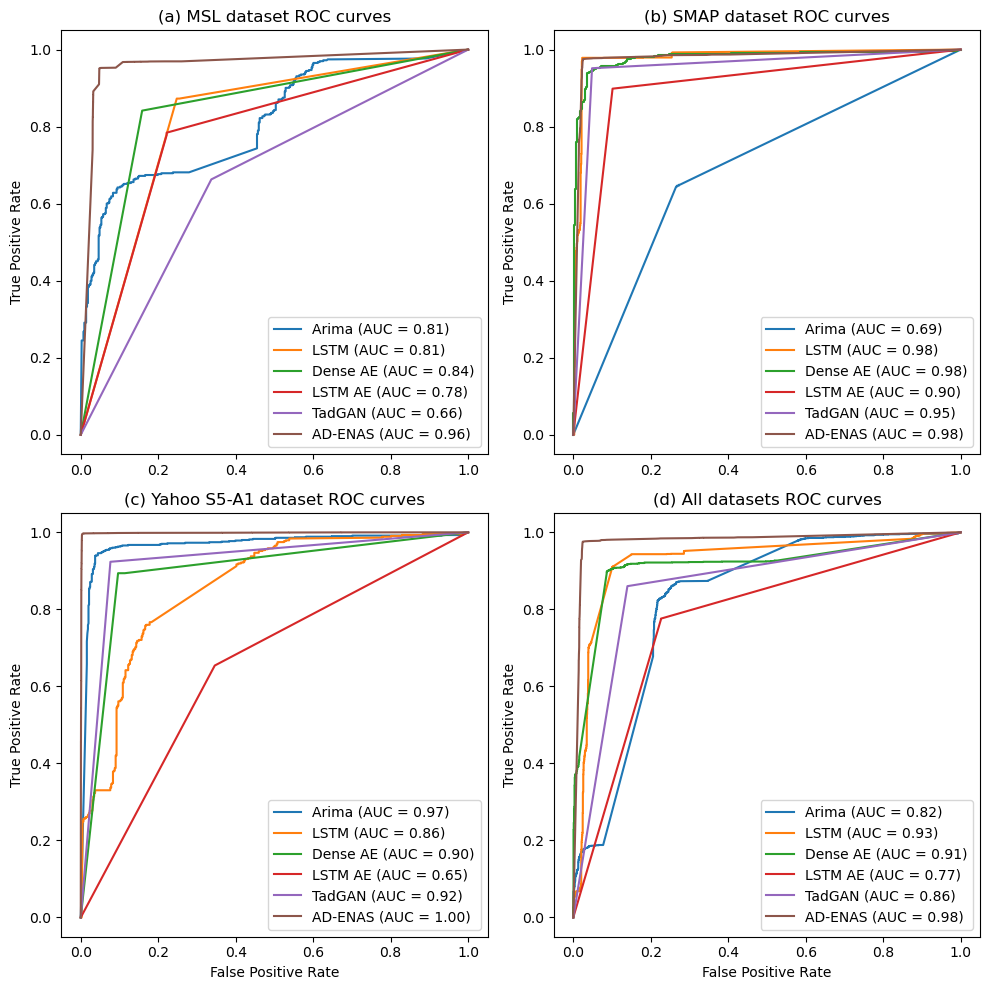

In [20]:
def plot_roc_sub(df,settype,ax,title):
    if settype != 'all':
        filter = (df.dataset == settype)
        df_methods = df.loc[filter,:]
        filter = df_io_res.dataset == settype
        to_plot2 = df_io_res.loc[filter,:]
    else:
        df_methods = df
        to_plot2 = df_io_res

    for method in df.method.unique():
        filter = (df_methods.method == method) 
        to_plot = df_methods.loc[filter,:]
            
        target = to_plot.loc[:,['target_normal','target_anomaly']]
        target = np.array(target).flatten()
        prediction = to_plot.loc[:,['predict_normal','predict_anomaly']]
        prediction = np.array(prediction).flatten()
        RocCurveDisplay.from_predictions(target,prediction,name=method,ax=ax)

    
    
    target = to_plot2.loc[:,['target_normal','target_anomaly']]
    target = np.array(target).flatten()
    prediction = to_plot2.loc[:,['predict_normal','predict_anomaly']]
    prediction = np.array(prediction).flatten()
    RocCurveDisplay.from_predictions(target,prediction,name='AD-ENAS',ax=ax)
    ax.set_ylabel('True Positive Rate')
    # ax.set_xlabel('False Positive Rate')
    ax.set_xlabel('')
    ax.set_title('{} ROC curves'.format(title))

fig, ax = plt.subplots(2,2,figsize=(10,10))

datasets_l = ['msl','smap','yahoo','all']
titles_l = ['(a) MSL dataset','(b) SMAP dataset','(c) Yahoo S5-A1 dataset','(d) All datasets']
rows = 2
columns = 2
       
for i, settype in enumerate(datasets_l):
    c = int(i/columns)
    r = (i%rows)
    plot_roc_sub(df_results,settype,ax[c][r],titles_l[i])
    
ax[1][0].set_xlabel('False Positive Rate')
ax[1][1].set_xlabel('False Positive Rate')
plt.tight_layout()
filename = 'experiments/results/Fig3.pdf'
plt.savefig(filename,format='pdf',dpi=300)
plt.show()

# Ablation Study

In [14]:
import pandas as pd
import numpy as np
from source._helpers import loadParameters
from source.fitness_functions_v2_5 import fitness_functions
from source.loaders.loader import loader
from source.F.task_loss_c import task_loss_c
from source.metrics import Metrics
from tqdm.notebook import trange, tqdm
rank = 0

In [15]:
# method to get best f1 scores for each channel given the funtion filter

def get_best_df (df,channels):
    best_df = pd.DataFrame({})
    for chan in channels:
        # print(chan)
        filter =  (df.channel == chan)
        fl,max_in,max_gen = df.loc[filter,:].groupby(['filter_lossf','input','gen'],axis=0).mean(numeric_only=True)['macro f1-score'].idxmax()
        filter = (df.channel == chan) & (df.input == max_in) & (df.filter_lossf == fl) & (df.gen == max_gen)
        best_df = pd.concat([best_df,df.loc[filter,:]],axis=0)
    # print('f1 score all channels for {} average {}'.format(fl,best_df['macro f1-score'].mean()))
    return best_df

# function used to lower results only applicable for not complete evolution in all channels
def clean_unexpected_higher(df,dataset):
    tmp = df.groupby(['dataset','adjw_method','filter_lossf','input','gen'],axis=0).mean(numeric_only=True).sort_values('macro f1-score',ascending = False)
    if 'msl' in dataset:
        filter = tmp.loc[:,'macro f1-score']<0.80
    elif 'smap' in dataset:
        filter = tmp.loc[:,'macro f1-score']<0.84
    elif 'yahoo' in dataset:
        filter = tmp.loc[:,'macro f1-score']<0.84
    idx = tmp.loc[filter,'macro f1-score'].idxmax()

    filter = (df.gen == idx[3]) #(df.input == idx[2]) & 
    return df.loc[filter,:].copy()

In [16]:
#method to calculate the shared weights performance for the best model for each channel
def calculate_shared_weights(df, chan, exp, settype):
    filter = (df.channel == chan) & (df.exp == exp)
    tmp = df.loc[filter,:]
    inputs = tmp.input.values[0]
    filt, lossf = tmp.filter_lossf.values[0].split('_',1)
    gen = tmp.gen.values[0]

    p = loadParameters(p_path)
    p['n_workers']=  0 
    p['n_slaves'] = 0
    p['gpus']     = []
    p['nn_input_size'] = inputs
    p['window_size']   = inputs
    p['output_filter'] = filt
    p['nn_loss_function'] = lossf
    if settype == 'yahoo':
        p['data_path'] += 'ad_S5A1_{}_one_sensor.csv'.format(chan)
    else:
        p['data_path'] += 'ad_{}_one_sensor.csv'.format(chan)
    dataset = loader(p,'testset')
    test_input,test_target = dataset.testset()

    if settype == 'smap_evolved':
        src_name = 'exp{}_ch{}_ins{}_{}_{}'.format(exp,chan,inputs,filt,lossf)
        p['filename'] = '{}{}_best/ind_{}.npy'.format(p['experiment_path'],src_name,str(gen).zfill(4))
    elif settype == 'msl':
        src_name = 'exp{}_ins{}_{}_{}'.format(exp,inputs,filt,lossf)
        p['filename'] = '{}group{}/channel_{}/{}_best/ind_{}.npy'.format(p['experiment_path'],tmp.iloc[0,]['cluster'],chan,src_name,str(gen).zfill(4))

    elif settype == 'yahoo':
        src_name = 'exp{}_ins{}_{}_{}'.format(exp,inputs,filt,lossf)
        p['filename'] = '{}cluster{}/channel_{}/{}_best/ind_{}.npy'.format(p['experiment_path'],tmp.iloc[0,]['cluster'],chan,src_name,str(gen).zfill(4))


    fit = fitness_functions(p,rank,verbose=False)
    loss_f = task_loss_c(p,rank).loss_function()
    fit.set_loss_f(loss_f)
    fit.set_dataset(test_input,test_target)
    fit.load_nn_architecture(p['filename'])
    sh_fitness = []
    for sh_val in fit.wValList:
        sh_weights = np.ones(len(fit.agent.keys))*sh_val
        sh_fitness = np.append(sh_fitness,fit.adj_w_agent_fitness(sh_weights))

    best_sw_idx = sh_fitness.argmin()
    #creating inital weights with best shared weight value
    shared_w = np.ones(len(fit.agent.keys))*fit.wValList[best_sw_idx]
    metrics = Metrics(p)
    metrics.set_class_values(fit)
    return metrics.get_score_report()


## MSL results

In [17]:
p_path = 'experiments/light_msl/msl_p.json'
exp_l = [1,2,3]
settype = 'msl'

groups_l = [0,1,2]
groups_chan = [[ 'C-2','F-7','M-3','M-4','M-5','P-10','S-2','T-4','T-5','T-8','T-9','T-12','T-13'],
                ['C-1','D-14','D-15','D-16','F-5','M-1','M-6','M-7','P-11','P-15'],
                ['F-8','M-2','P-14']]
channels_flat = [item for sublist in groups_chan for item in sublist]
df_light = pd.DataFrame({})
for cl in groups_l:
    filename = 'experiments/light_msl/group{}/scores.csv'.format(cl)
    df_temp = pd.read_csv(filename)
    df_temp['dataset'] = 'msl'
    df_temp['cluster'] = cl
    df_light = pd.concat([df_light,df_temp])
df_light.reset_index(inplace=True,drop=True)
# df_scores = clean_unexpected_higher(df_scores,settype)
# df_light.head()

In [18]:
channels_l = ['F-8','M-2','P-14']
df_deep = pd.DataFrame({})
for channel in channels_l:
    filename = 'experiments/deep_msl/msl_{}_diff/scores.csv'.format(channel)
    df_temp = pd.read_csv(filename)
    filename = 'experiments/deep_msl/msl_{}_non-diff/scores.csv'.format(channel)
    df_temp2 = pd.read_csv(filename)
    df_temp = pd.concat([df_temp,df_temp2])
    df_temp['dataset'] = 'msl'
    df_temp['channel'] = channel
    df_deep = pd.concat([df_deep,df_temp])
df_deep.reset_index(inplace=True,drop=True)
df_deep = clean_unexpected_higher(df_deep,settype)
# df_deep.head()

#### AD-ENAS Ablation for msl

In [19]:
filter = df_light.filter_lossf != 'softmax_bce'
best_df = get_best_df(df_light.loc[filter,:],channels_flat)

#** AD-ENAS Shared weights non-diff loss function**
df_sw = pd.DataFrame({})
for chan in tqdm(channels_flat, desc='1st loop'):
    # for exp in tqdm(exp_l,desc='channel {}'.format(chan)):
    for exp in exp_l:
        score = calculate_shared_weights(best_df,chan,exp,settype)
        score['channel'] = chan
        score['exp'] = exp
        df_sw = pd.concat([df_sw,score])
        # print('calculating shared weights for channel {}'.format(chan))
print('AD-ENAS {} dataset: Shared weights F1 score {:.4f}'.format(settype,df_sw.loc[:,'macro f1-score'].mean()))

# #** AD-ENAS Random weights initialization
filter = (df_deep.adjw_method == 'cma_IRG') & (df_deep.filter_lossf == 'none_mae')
df_irg = get_best_df(df_deep.loc[filter,:],channels_l)
print('AD-ENAS {} dataset: Random weights initialization F1 score {:.4f}'.format(settype,df_irg.loc[:,'macro f1-score'].mean()))

#** AD-ENAS Best-shared weights initialization
filter = (df_deep.adjw_method == 'cma_IBSW') & (df_deep.filter_lossf == 'none_mae')
ibsw_best = get_best_df(df_deep.loc[filter,:],channels_l)
print('AD-ENAS {} dataset: Best shared weights initialization F1 score {:.4f}'.format(settype,ibsw_best.loc[:,'macro f1-score'].mean()))

#** AD-ENAS with Differentiable loss function**
filter = (df_light.adjw_method == 'cma_IBSW') & (df_light.filter_lossf == 'softmax_bce')
df_diff = get_best_df(df_light.loc[filter,:],channels_flat)
print('AD-ENAS {} dataset: Differetiable loss function F1 score {:.4f}'.format(settype,df_diff.loc[:,'macro f1-score'].mean()))

#** AD-ENAS with Non-Differentiable loss functions**
filter = (df_light.adjw_method == 'cma_IBSW') & (df_light.filter_lossf != 'softmax_bce')
df_ndiff = get_best_df(df_light.loc[filter,:],channels_flat)
print('AD-ENAS {} dataset: Non-differentiable loss functions F1 score {:.4f}'.format(settype,df_ndiff.loc[:,'macro f1-score'].mean()))

1st loop:   0%|          | 0/26 [00:00<?, ?it/s]

AD-ENAS msl dataset: Shared weights F1 score 0.6385
AD-ENAS msl dataset: Random weights initialization F1 score 0.6781
AD-ENAS msl dataset: Best shared weights initialization F1 score 0.7589
AD-ENAS msl dataset: Differetiable loss function F1 score 0.7992
AD-ENAS msl dataset: Non-differentiable loss functions F1 score 0.8049


## SMAP results

In [20]:
p_path = 'experiments/light_smap_evolved/smap_p.json'
exp_l = [1]
settype = 'smap_evolved'

channel_l =['A-1','A-2','A-3','A-4','A-5','A-6','A-7','A-8','A-9','B-1','D-1','D-2',\
              'D-3','D-4','D-5','D-6','D-7','D-8','D-9','D-11','D-12','D-13','E-1','E-2',\
              'E-3','E-4','E-5','E-6','E-7','E-8','E-9','E-10','E-11','E-12','E-13','F-1',\
              'F-2','F-3','G-1','G-2','G-3','G-4','G-6','G-7','P-1','P-2','P-3','P-4',\
              'R-1','S-1','T-1','T-2','T-3']
channels_flat = channel_l

df_light = pd.DataFrame({})
filename = 'experiments/light_smap_evolved/scores.csv'
df_temp = pd.read_csv(filename)
df_temp['dataset'] = 'smap_evolved'

df_light = pd.concat([df_light,df_temp])
# df_light = clean_unexpected_higher(df_light,settype)
df_light.reset_index(inplace=True,drop=True)
# df_light.head()

In [21]:
channels_l = ['D-1','E-2','P-4']
df_deep = pd.DataFrame({})
for channel in channels_l:
    filename = 'experiments/deep_smap/smap_{}_diff/scores.csv'.format(channel)
    df_temp = pd.read_csv(filename)
    df_temp['smooth'] = 'diff'
    filename = 'experiments/deep_smap/smap_{}_non-diff/scores.csv'.format(channel)
    df_temp2 = pd.read_csv(filename)
    df_temp2['smooth'] = 'non-diff'
    df_temp = pd.concat([df_temp,df_temp2])
    df_temp['dataset'] = 'smap'
    df_temp['channel'] = channel
    df_deep = pd.concat([df_deep,df_temp])
df_deep = clean_unexpected_higher(df_deep,settype)
df_deep.reset_index(inplace=True,drop=True)
# df_deep.head()

#### AD-ENAS Ablation for smap

In [22]:
filter = df_light.filter_lossf != 'softmax_bce'
best_df = get_best_df(df_light.loc[filter,:],channels_flat)

#** AD-ENAS Shared weights non-diff loss function**
df_sw = pd.DataFrame({})
for chan in tqdm(channels_flat, desc='1st loop'):
    # for exp in tqdm(exp_l,desc='channel {}'.format(chan)):
    for exp in exp_l:
        score = calculate_shared_weights(best_df,chan,exp,settype)
        score['channel'] = chan
        score['exp'] = exp
        df_sw = pd.concat([df_sw,score])
        # print('calculating shared weights for channel {}'.format(chan))
print('AD-ENAS {} dataset: Shared weights F1 score {:.4f}'.format(settype,df_sw.loc[:,'macro f1-score'].mean()))

# #** AD-ENAS Random weights initialization
filter = (df_deep.adjw_method == 'cma_IRG') & (df_deep.filter_lossf == 'none_mae')
df_irg = get_best_df(df_deep.loc[filter,:],channels_l)
print('AD-ENAS {} dataset: Random weights initialization F1 score {:.4f}'.format(settype,df_irg.loc[:,'macro f1-score'].mean()))

#** AD-ENAS Best-shared weights initialization
filter = (df_deep.adjw_method == 'cma_IBSW') & (df_deep.filter_lossf == 'none_mae')
ibsw_best = get_best_df(df_deep.loc[filter,:],channels_l)
print('AD-ENAS {} dataset: Best shared weights initialization F1 score {:.4f}'.format(settype,ibsw_best.loc[:,'macro f1-score'].mean()))

#** AD-ENAS with Differentiable loss function**
filter = (df_light.adjw_method == 'cma_IBSW') & (df_light.filter_lossf == 'softmax_bce')
df_diff = get_best_df(df_light.loc[filter,:],channels_flat)
print('AD-ENAS {} dataset: Differetiable loss function F1 score {:.4f}'.format(settype,df_diff.loc[:,'macro f1-score'].mean()))

#** AD-ENAS with Non-Differentiable loss functions**
filter = (df_light.adjw_method == 'cma_IBSW') & (df_light.filter_lossf != 'softmax_bce')
df_ndiff = get_best_df(df_light.loc[filter,:],channels_flat)
print('AD-ENAS {} dataset: Non-differentiable loss functions F1 score {:.4f}'.format(settype,df_ndiff.loc[:,'macro f1-score'].mean()))

1st loop:   0%|          | 0/53 [00:00<?, ?it/s]

AD-ENAS smap_evolved dataset: Shared weights F1 score 0.5109
AD-ENAS smap_evolved dataset: Random weights initialization F1 score 0.7135
AD-ENAS smap_evolved dataset: Best shared weights initialization F1 score 0.7595
AD-ENAS smap_evolved dataset: Differetiable loss function F1 score 0.7720
AD-ENAS smap_evolved dataset: Non-differentiable loss functions F1 score 0.8400


## Yahoo results

In [23]:
p_path = 'experiments/light_yahoo/yahoo_p.json'
exp_l = [1,2,3]
settype = 'yahoo'

cluster_l = [0,1,2,3,4]
cluster_chan = [[3,6,10,14,28,30,37,50,61,63],
                [2,8,11,20,22,25,32,42,58,62,66,67],
                [7,17,19,31,43,48,57,65],
                [1,13,15,18,23,24,26,27,29,34,35,36,38,39,40,44,46,47,49,51,52,53,54,55,56,59,64],
                [4,5,9,12,16,21,33,41,45,60]]

channels_flat = [item for sublist in cluster_chan for item in sublist]



df_light = pd.DataFrame({})
for cl in cluster_l:
    filename = 'experiments/light_yahoo/cluster{}/scores.csv'.format(cl)
    df_temp = pd.read_csv(filename)
    df_temp['dataset'] = 'yahoo'
    df_temp['cluster'] = cl
    df_light = pd.concat([df_light,df_temp])
df_light.reset_index(inplace=True,drop=True)
# df_scores = clean_unexpected_higher(df_scores,settype)
# df_scores.head()

In [24]:
channels_l = [10,12,54,62,19]
df_deep = pd.DataFrame({})
for channel in channels_l:
    filename = 'experiments/deep_yahoo/channel_{}_diff/scores.csv'.format(channel)
    df_temp = pd.read_csv(filename)
    df_temp['smooth'] = 'diff'
    filename = 'experiments/deep_yahoo/channel_{}_non-diff/scores.csv'.format(channel)
    df_temp2 = pd.read_csv(filename)
    df_temp2['smooth'] = 'non-diff'
    df_temp = pd.concat([df_temp,df_temp2])
    df_temp['dataset'] = 'yahoo'
    df_temp['channel'] = channel
    df_deep = pd.concat([df_deep,df_temp])
df_deep = clean_unexpected_higher(df_deep,settype)
df_deep.reset_index(inplace=True,drop=True)
# df_deep.head()

#### AD-ENAS Ablation for Yahoo

In [25]:
filter = df_light.filter_lossf != 'softmax_bce'
best_df = get_best_df(df_light.loc[filter,:],channels_flat)

#** AD-ENAS Shared weights non-diff loss function**
df_sw = pd.DataFrame({})
for chan in tqdm(channels_flat, desc='1st loop'):
    # for exp in tqdm(exp_l,desc='channel {}'.format(chan)):
    for exp in exp_l:
        score = calculate_shared_weights(best_df,chan,exp,settype)
        score['channel'] = chan
        score['exp'] = exp
        df_sw = pd.concat([df_sw,score])
        # print('calculating shared weights for channel {}'.format(chan))
print('AD-ENAS {} dataset: Shared weights F1 score {:.4f}'.format(settype,df_sw.loc[:,'macro f1-score'].mean()))

# #** AD-ENAS Random weights initialization
filter = (df_deep.adjw_method == 'cma_IRG') & (df_deep.filter_lossf == 'none_mae')
df_irg = get_best_df(df_deep.loc[filter,:],channels_l)
print('AD-ENAS {} dataset: Random weights initialization F1 score {:.4f}'.format(settype,df_irg.loc[:,'macro f1-score'].mean()))

#** AD-ENAS Best-shared weights initialization
filter = (df_deep.adjw_method == 'cma_IBSW') & (df_deep.filter_lossf == 'none_mae')
ibsw_best = get_best_df(df_deep.loc[filter,:],channels_l)
print('AD-ENAS {} dataset: Best shared weights initialization F1 score {:.4f}'.format(settype,ibsw_best.loc[:,'macro f1-score'].mean()))

#** AD-ENAS with Differentiable loss function**
filter = (df_light.adjw_method == 'cma_IBSW') & (df_light.filter_lossf == 'softmax_bce')
df_diff = get_best_df(df_light.loc[filter,:],channels_flat)
print('AD-ENAS {} dataset: Differetiable loss function F1 score {:.4f}'.format(settype,df_diff.loc[:,'macro f1-score'].mean()))

#** AD-ENAS with Non-Differentiable loss functions**
filter = (df_light.adjw_method == 'cma_IBSW') & (df_light.filter_lossf != 'softmax_bce')
df_ndiff = get_best_df(df_light.loc[filter,:],channels_flat)
print('AD-ENAS {} dataset: Non-differentiable loss functions F1 score {:.4f}'.format(settype,df_ndiff.loc[:,'macro f1-score'].mean()))

1st loop:   0%|          | 0/67 [00:00<?, ?it/s]

AD-ENAS yahoo dataset: Shared weights F1 score 0.5792
AD-ENAS yahoo dataset: Random weights initialization F1 score 0.6246
AD-ENAS yahoo dataset: Best shared weights initialization F1 score 0.6292
AD-ENAS yahoo dataset: Differetiable loss function F1 score 0.8158
AD-ENAS yahoo dataset: Non-differentiable loss functions F1 score 0.8493


# Input window size, output filter and loss function evolution though generations

In [1]:
import pandas as pd
import numpy as np
#visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# method to get best f1 scores for each channel given the funtion filter

def get_best_df (df,channels,best_gen=True):
    best_df = pd.DataFrame({})
    for chan in channels:
        filter =  (df.channel == chan)
        fl,max_in,max_gen = df.loc[filter,:].groupby(['filter_lossf','input','gen'],axis=0).mean(numeric_only=True)['macro f1-score'].idxmax()
        if best_gen:
            filter = (df.channel == chan) & (df.input == max_in) & (df.filter_lossf == fl) & (df.gen == max_gen)
        else:
            filter = (df.channel == chan) & (df.input == max_in) & (df.filter_lossf == fl)
        best_df = pd.concat([best_df,df.loc[filter,:]],axis=0)
    # print('f1 score all channels for {} average {}'.format(fl,best_df['macro f1-score'].mean()))
    return best_df


### Loading all datasets deep experiments

In [3]:
channels = [['F-8','M-2','P-14'],['D-1','E-2','P-4'],[10,12,54,62,19]]
settype_l = ['msl','smap','yahoo']
channels_list = [item for sublist in channels for item in sublist]
diff_l = ['diff','non-diff']
df_scores = pd.DataFrame({})
for i, settype in enumerate(settype_l):
    for channel in channels[i]:
        aux = pd.DataFrame({})
        for d_item in diff_l:
            if settype == 'yahoo':
                filename = 'experiments/deep_{}/channel_{}_{}/scores.csv'.format(settype,channel,d_item)
            else:
                filename = 'experiments/deep_{}/{}_{}_{}/scores.csv'.format(settype,settype,channel,d_item)
            df_temp = pd.read_csv(filename)
            aux = pd.concat([aux,df_temp])

        aux['dataset'] = settype
        aux['channel'] = channel
        df_scores = pd.concat([df_scores,aux])

filter = (df_scores.adjw_method == 'cma_IBSW')
df_scores = df_scores.loc[filter,:]
df_scores.reset_index(inplace=True,drop=True)
df_scores.head()

,task_type,dataset,channel,exp,input,filter_lossf,gen,adjw_method,ROC_micro,ROC_macro,AP_micro,AP_macro,hamming loss,accuracy,macro precision,macro recall,macro f1-score
0,binary_classification,msl,F-8,1,10,none_mae,10,cma_IBSW,0.753353,0.498409,0.682006,0.505358,0.233871,0.766129,0.604301,0.535182,0.523314
1,binary_classification,msl,F-8,1,10,none_mae,20,cma_IBSW,0.774194,0.516333,0.716102,0.505762,0.223790,0.776210,0.388105,0.500000,0.437003
2,binary_classification,msl,F-8,1,10,none_mae,30,cma_IBSW,0.766942,0.529367,0.721535,0.520579,0.233871,0.766129,0.592781,0.525565,0.505772
3,binary_classification,msl,F-8,1,10,none_mae,40,cma_IBSW,0.775137,0.545689,0.740254,0.547512,0.229839,0.770161,0.613843,0.531368,0.514294
4,binary_classification,msl,F-8,1,10,none_mae,50,cma_IBSW,0.779797,0.530402,0.722213,0.523659,0.227823,0.772177,0.617857,0.526255,0.503081


In [4]:
l_filter = ['mio','none','softmax','mio','mio','none','none','mio']
l_loss_f = ['mae','mae','bce','bin_f1','bin_ap','bin_f1','bin_ap','bce']

df_fun = pd.DataFrame({})
for settype in settype_l:
    for filt,lossf in zip(l_filter,l_loss_f):
        fl = '{}_{}'.format(filt,lossf)
        filter = (df_scores.dataset == settype) & (df_scores.filter_lossf == fl)
        aux = df_scores.loc[filter,:].copy()
        aux.loc[filter,'filter'] = filt
        aux.loc[:,'lossf'] = lossf
        df_fun = pd.concat([df_fun,aux])

df_fun

,task_type,dataset,channel,exp,input,filter_lossf,gen,adjw_method,ROC_micro,ROC_macro,AP_micro,AP_macro,hamming loss,accuracy,macro precision,macro recall,macro f1-score,filter,lossf
59,binary_classification,msl,F-8,1,10,mio_mae,10,cma_IBSW,0.770161,0.528162,0.708068,0.514461,0.229839,0.770161,0.610626,0.528162,0.508193,mio,mae
60,binary_classification,msl,F-8,1,10,mio_mae,20,cma_IBSW,0.774194,0.524348,0.712279,0.513171,0.225806,0.774194,0.627778,0.524348,0.497685,mio,mae
61,binary_classification,msl,F-8,1,10,mio_mae,30,cma_IBSW,0.776210,0.528852,0.714397,0.516277,0.223790,0.776210,0.643305,0.528852,0.505457,mio,mae
62,binary_classification,msl,F-8,1,10,mio_mae,40,cma_IBSW,0.778226,0.526945,0.716523,0.515894,0.221774,0.778226,0.659598,0.526945,0.499982,mio,mae
63,binary_classification,msl,F-8,1,10,mio_mae,50,cma_IBSW,0.772177,0.519843,0.710169,0.510217,0.227823,0.772177,0.610417,0.519843,0.489800,mio,mae
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101711,binary_classification,yahoo,19,3,100,mio_bce,5,cma_IBSW,0.926471,0.834552,0.895112,0.787276,0.073529,0.926471,0.891138,0.834552,0.859213,mio,bce
101712,binary_classification,yahoo,19,3,100,mio_bce,6,cma_IBSW,0.985294,0.982493,0.978157,0.957073,0.014706,0.985294,0.966518,0.982493,0.974279,mio,bce
101713,binary_classification,yahoo,19,3,100,mio_bce,7,cma_IBSW,0.981618,0.980281,0.972764,0.947341,0.018382,0.981618,0.956942,0.980281,0.968116,mio,bce
101714,binary_classification,yahoo,19,3,100,mio_bce,8,cma_IBSW,0.988971,0.976048,0.983578,0.966549,0.011029,0.988971,0.984484,0.976048,0.980205,mio,bce


### changing filter and lossf names for plotting

In [5]:
ofilter = {'none':'No filter','mio':'MaxToOne','softmax':'Softmax'}
olossf = {'mae':'MAE','bce':'BCE','bin_ap':'AP','bin_f1':'F1'}
df = df_fun
for of in ofilter:
    filter = df.loc[:,'filter'] == of
    df.loc[filter,'filter'] = ofilter[of]
    
for olf in olossf:
    filter = df.loc[:,'lossf'] == olf
    df.loc[filter,'lossf'] = olossf[olf]
    
df_fun = df.rename(columns={'input':'Input Ws','filter':'Output filter','lossf':'Loss function'})

In [6]:
df_fun.head()

,task_type,dataset,channel,exp,Input Ws,filter_lossf,gen,adjw_method,ROC_micro,ROC_macro,AP_micro,AP_macro,hamming loss,accuracy,macro precision,macro recall,macro f1-score,Output filter,Loss function
59,binary_classification,msl,F-8,1,10,mio_mae,10,cma_IBSW,0.770161,0.528162,0.708068,0.514461,0.229839,0.770161,0.610626,0.528162,0.508193,MaxToOne,MAE
60,binary_classification,msl,F-8,1,10,mio_mae,20,cma_IBSW,0.774194,0.524348,0.712279,0.513171,0.225806,0.774194,0.627778,0.524348,0.497685,MaxToOne,MAE
61,binary_classification,msl,F-8,1,10,mio_mae,30,cma_IBSW,0.776210,0.528852,0.714397,0.516277,0.223790,0.776210,0.643305,0.528852,0.505457,MaxToOne,MAE
62,binary_classification,msl,F-8,1,10,mio_mae,40,cma_IBSW,0.778226,0.526945,0.716523,0.515894,0.221774,0.778226,0.659598,0.526945,0.499982,MaxToOne,MAE
63,binary_classification,msl,F-8,1,10,mio_mae,50,cma_IBSW,0.772177,0.519843,0.710169,0.510217,0.227823,0.772177,0.610417,0.519843,0.489800,MaxToOne,MAE


### Input evolution throught generations

### output filter evolution throught generations

(0.4, 0.9)

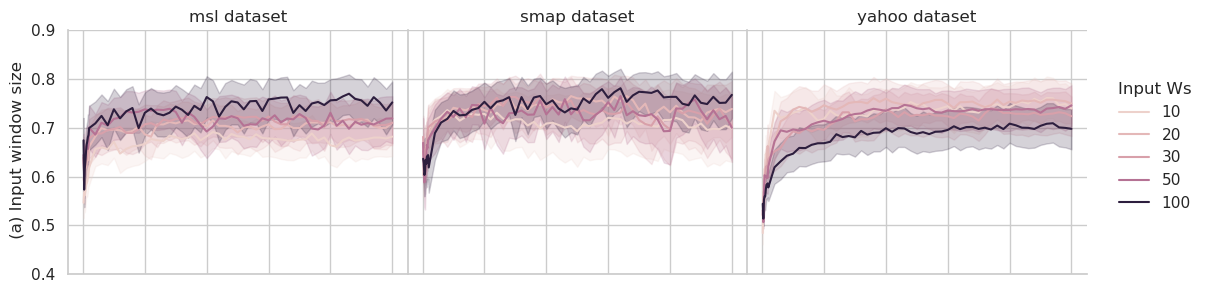

In [7]:
sns.set_theme(style="whitegrid")
g = sns.relplot(
    data=df_fun, kind="line",
    x="gen", y="macro f1-score",
    hue="Input Ws",  col='dataset',
    height=3, aspect=1.25)

g.set_axis_labels('',' (a) Input window size')
g.set_titles("{col_name} dataset")
g.set(xticklabels=[])
g.tight_layout(w_pad=0)

plt.ylim([0.4,0.9])

(0.4, 0.9)

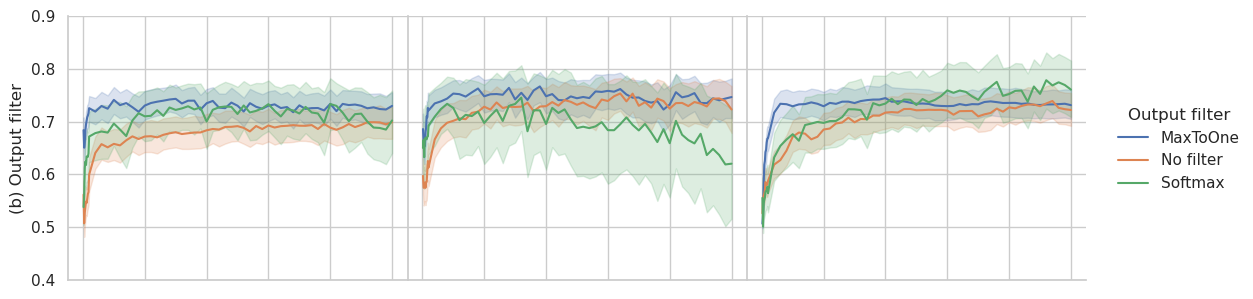

In [8]:
sns.set_theme(style="whitegrid")
g = sns.relplot(
    data=df_fun, kind="line",
    x="gen", y="macro f1-score",
    hue="Output filter", col='dataset',
    height=3, aspect=1.25)

g.set_axis_labels('','(b) Output filter')
# g.set_titles("{col_name} dataset")
g.set_titles("")
g.set(xticklabels=[])
g.tight_layout(w_pad=0)

plt.ylim([0.4,0.9])

### loss function evolution throught generations

(0.4, 0.9)

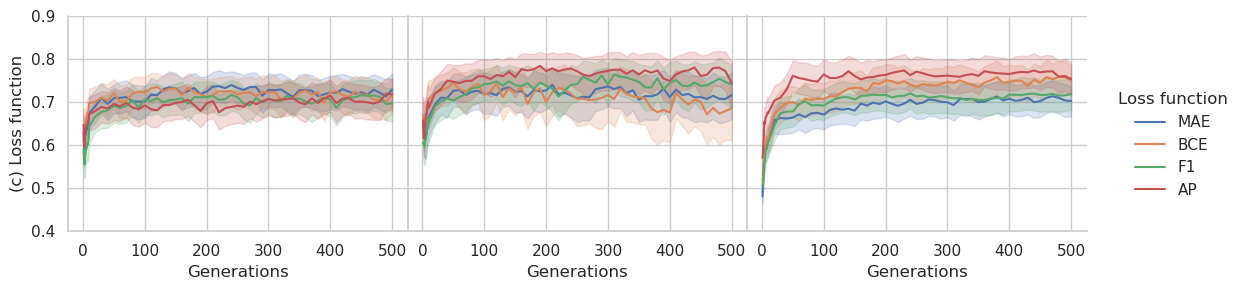

In [10]:
sns.set_theme(style="whitegrid")
g = sns.relplot(
    data=df_fun, kind="line",
    x="gen", y="macro f1-score",
    hue="Loss function", col='dataset',
    height=3, aspect=1.25)

g.set_axis_labels('Generations','(c) Loss function')
# g.set_titles("{col_name} dataset")
g.set_titles("")
g.tight_layout(w_pad=0)
plt.ylim([0.4,0.9])

# diff vs non-diff 

In [21]:
import pandas as pd
import numpy as np
import torch
#visualization
from sklearn.metrics import RocCurveDisplay
from matplotlib import pyplot as plt
import seaborn as sns

In [22]:
# method to get best f1 scores for each channel given the funtion filter

def get_best_df (df,channels,best_gen=True):
    best_df = pd.DataFrame({})
    for chan in channels:
        filter =  (df.channel == chan)
        fl,max_in,max_gen = df.loc[filter,:].groupby(['filter_lossf','input','gen'],axis=0).mean(numeric_only=True)['macro f1-score'].idxmax()
        if best_gen:
            filter = (df.channel == chan) & (df.input == max_in) & (df.filter_lossf == fl) & (df.gen == max_gen)
        else:
            filter = (df.channel == chan) & (df.input == max_in) & (df.filter_lossf == fl)
        best_df = pd.concat([best_df,df.loc[filter,:]],axis=0)
    # print('f1 score all channels for {} average {}'.format(fl,best_df['macro f1-score'].mean()))
    return best_df


In [23]:
settype_light = ['msl','smap_evolved','yahoo']
join_l = ['/group','','/cluster']
group_size = [3,1,5]

channels_light =[[ 'C-2','F-7','M-3','M-4','M-5','P-10','S-2','T-4','T-5','T-8','T-9','T-12','T-13',
            'C-1','D-14','D-15','D-16','F-5','M-1','M-6','M-7','P-11','P-15',
            'F-8','M-2','P-14'],
            ['A-1','A-2','A-3','A-4','A-5','A-6','A-7','A-8','A-9','B-1','D-1','D-2',\
              'D-3','D-4','D-5','D-6','D-7','D-8','D-9','D-11','D-12','D-13','E-1','E-2',\
              'E-3','E-4','E-5','E-6','E-7','E-8','E-9','E-10','E-11','E-12','E-13','F-1',\
              'F-2','F-3','G-1','G-2','G-3','G-4','G-6','G-7','P-1','P-2','P-3','P-4',\
              'R-1','S-1','T-1','T-2','T-3'],
           [3,6,10,14,28,30,37,50,61,63,
            2,8,11,20,22,25,32,42,58,62,66,67,
            7,17,19,31,43,48,57,65,
            1,13,15,18,23,24,26,27,29,34,35,36,38,39,40,44,46,47,49,51,52,53,54,55,56,59,64,
            4,5,9,12,16,21,33,41,45,60]]

channels = [item for sublist in channels_light for item in sublist]

df_light = pd.DataFrame({})
for settype,join,gz in zip(settype_light,join_l,group_size):
    for group in range(gz):
        if settype == 'smap_evolved':
            filename = 'experiments/light_{}/scores.csv'.format(settype)
        else:
            filename = 'experiments/light_{}{}{}/scores.csv'.format(settype,join,group)
        temp = pd.read_csv(filename)
        temp['dataset'] = settype
        temp['cluster'] = group
        df_light = pd.concat([df_light,temp])
df_light.reset_index(inplace=True,drop=True)
filter = df_light.adjw_method == 'cma_IBSW'
df_light = df_light.loc[filter,:]
df_light.head()

,task_type,channel,exp,input,filter_lossf,gen,adjw_method,ROC_micro,ROC_macro,AP_micro,AP_macro,hamming loss,accuracy,macro precision,macro recall,macro f1-score,dataset,cluster
0,binary_classification,C-2,1,100,mio_mae,150,cma_IBSW,0.974684,0.711661,0.962666,0.660466,0.025316,0.974684,0.864664,0.711661,0.766217,msl,0
1,binary_classification,C-2,1,100,mio_mae,160,cma_IBSW,0.979747,0.748688,0.970030,0.718544,0.020253,0.979747,0.928456,0.748688,0.812973,msl,0
2,binary_classification,C-2,1,100,mio_mae,170,cma_IBSW,0.972152,0.675947,0.959003,0.627313,0.027848,0.972152,0.845545,0.675947,0.730943,msl,0
3,binary_classification,C-2,1,100,mio_mae,180,cma_IBSW,0.977215,0.712973,0.966342,0.683471,0.022785,0.977215,0.918262,0.712973,0.779863,msl,0
4,binary_classification,C-2,1,100,mio_mae,190,cma_IBSW,0.977215,0.747375,0.966342,0.694192,0.022785,0.977215,0.879822,0.747375,0.798481,msl,0


In [24]:
filter = (df_light.filter_lossf == 'softmax_bce')
df_diff = get_best_df(df_light.loc[filter,:],channels)
df_diff['diff_type'] = 'Differential' 
filter = (df_light.filter_lossf != 'softmax_bce')
df_ndiff = get_best_df(df_light.loc[filter,:],channels)
df_ndiff['diff_type'] = 'Non-Differential' 
df_dnd = pd.concat([df_diff,df_ndiff])

filter = (df_light.filter_lossf == 'softmax_bce')
df_diff = get_best_df(df_light.loc[filter,:],channels)
df_diff['diff_type'] = 'Differential' 
df_diff['dataset'] = 'all'
filter = (df_light.filter_lossf != 'softmax_bce')
df_ndiff = get_best_df(df_light.loc[filter,:],channels)
df_ndiff['diff_type'] = 'Non-Differential'
df_ndiff['dataset'] = 'all'
df_dnd = pd.concat([df_dnd,df_diff,df_ndiff])

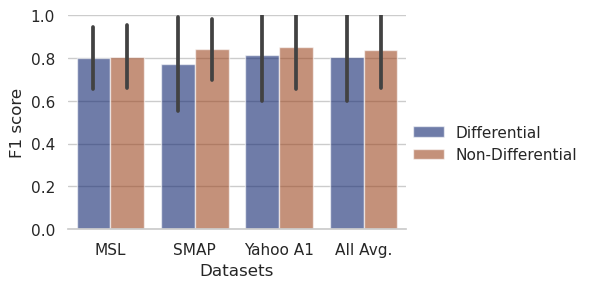

In [25]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=df_dnd, kind="bar",
    x="dataset", y="macro f1-score", hue="diff_type",
    errorbar="sd", palette="dark", alpha=.6, height=3,aspect=1.5)
g.despine(left=True)
g.set_axis_labels('Datasets','F1 score')
g.legend.set_title("")
# g.set_titles("{col_name} dataset")
# g.tight_layout(w_pad=0)
g.set_xticklabels(['MSL','SMAP','Yahoo A1','All Avg.'])
plt.ylim([0,1])
plt.show()

In [26]:
df = df_light

df_io_res = pd.DataFrame({})
df_results = pd.DataFrame({})
fl_l = ['softmax_bce','mio_mae','none_mae','mio_bin_ap','none_bin_ap','mio_bin_f1','none_bin_f1','non-diff']
for flossf in fl_l:
    if flossf == 'non-diff':
        filter = df.filter_lossf != 'softmax_bce'
        aux = df.loc[filter,:]
    else:
        filter = df.filter_lossf == flossf
        aux = df.loc[filter,:]
    channel_l = aux.channel.unique()
    tmp = get_best_df(aux,channel_l)
    tmp['diff'] = flossf
    df_results = pd.concat([df_results,tmp])
    idx = tmp.groupby(['dataset','cluster','filter_lossf','channel','input','gen']).mean(numeric_only=True).index
    
    for row_idx in idx:
        if row_idx[0] == 'msl':
            exp_l = [1,2,3]
            cl,fl,channel,inputs,gen = row_idx[1],row_idx[2],row_idx[3],row_idx[4],row_idx[5]
            cluster = '/home/sgomez/ENAS2/experiments/light_msl/group{}'.format(cl)
        elif row_idx[0] == 'smap':
            exp_l = [1]
            fl,channel,inputs,gen = row_idx[1],row_idx[2],row_idx[3],row_idx[4]
            cluster = '/home/sgomez/ENAS2/experiments/light_smap_evolved'
        elif row_idx[0] == 'yahoo':
            exp_l = [1,2,3]
            cl,fl,channel,inputs,gen = row_idx[1],row_idx[2],row_idx[3],row_idx[4],row_idx[5]
            cluster = '/home/sgomez/ENAS2/experiments/light_yahoo/cluster{}'.format(cl)

        chan_avg = pd.DataFrame({})
        for exp in exp_l:
            filename = '{}/in_out_results/cma_IBSW/exp{}_ch{}_ins{}_{}_g{}.csv'.\
                        format(cluster,exp,channel,inputs,fl,str(gen).zfill(4))
            tmp = pd.read_csv(filename,index_col=0)
            tmp['exp'] = exp
            tmp['filter_lossf'] = flossf
            if 'none' in fl:
                to_soft = torch.tensor(tmp.loc[:,['predict_normal','predict_anomaly']].values)
                tmp.loc[:,['predict_normal','predict_anomaly']] = torch.softmax(to_soft,dim=1)
            chan_avg = pd.concat([chan_avg,tmp])
        chan_avg.reset_index(inplace=True)
        # chan_avg = chan_avg.groupby(['index'],axis=0).mean(numeric_only=True)
        # chan_avg['filter_lossf'] = fl
        df_io_res = pd.concat([df_io_res,chan_avg])

    # print('filter lossf {} avg {}'.format(fl, tmp.loc[:,'macro f1-score'].mean()))

In [27]:
# def plot_roc_sub(df,fl_l,ax,title):
#     for flossf in fl_l:
#         filter = (df.filter_lossf == flossf) 
#         to_plot = df.loc[filter,:]
            
#         target = to_plot.loc[:,['target_normal','target_anomaly']]
#         target = np.array(target).flatten()
#         prediction = to_plot.loc[:,['predict_normal','predict_anomaly']]
#         prediction = np.array(prediction).flatten()
#         RocCurveDisplay.from_predictions(target,prediction,name=flossf,ax=ax)

    
#     ax.set_ylabel('True Positive Rate')
#     ax.set_xlabel('False Positive Rate')
#     ax.set_title('{} ROC curves'.format(title))

# fig, ax = plt.subplots(1,2,figsize=(10,4))

# plot_roc_sub(df_io_res,fl_l,ax[0],'test')
# ax[0].set_xlabel('False Positive Rate')
# ax[0].set_xlabel('False Positive Rate')
# plt.show()




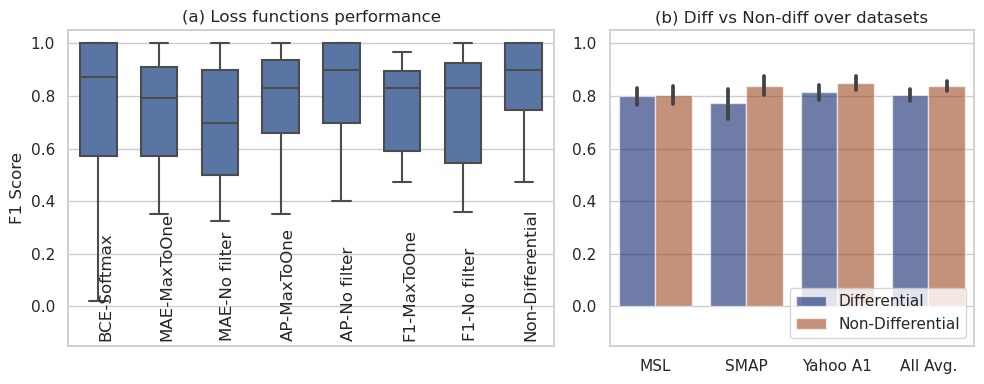

In [29]:
sns.set_theme(style="whitegrid")
# fl_l = ['softmax_bce','mio_mae','none_mae','mio_bin_ap','none_bin_ap','mio_bin_f1','none_bin_f1','non-diff']
x_labels =['BCE-Softmax','MAE-MaxToOne','MAE-No filter','AP-MaxToOne','AP-No filter','F1-MaxToOne','F1-No filter','Non-Differential']

f, ax = plt.subplots(1, 2, figsize=(10, 4), sharey=False, gridspec_kw=dict(width_ratios=[4, 3]))
to_plot = df_results
g = sns.boxplot(x="diff", y="macro f1-score", data=to_plot, color="b",width=0.6,ax=ax[0])

ax[0].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

ax[0].set_ylim([-0.15,1.05])
for t,text in enumerate(x_labels):
    ax[0].text(t*1,-0.12,text, rotation=90)
ax[0].set_xlabel('')
ax[0].set_ylabel('F1 Score')
ax[0].set_title('(a) Loss functions performance')
    
sns.set_theme(style="whitegrid")
g = sns.barplot(
    data=df_dnd, x="dataset", y="macro f1-score",
    hue="diff_type", ax=ax[1], 
    palette="dark", alpha=.6)#,errorbar="sd" )
g.set_xticklabels(['MSL','SMAP','Yahoo A1','All Avg.'])

ax[1].set_ylim([-0.15,1.05])
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].set_title('(b) Diff vs Non-diff over datasets')
plt.legend(loc='lower right')

plt.tight_layout()
filename = 'experiments/results/Fig5.pdf'
plt.savefig(filename,format='pdf',dpi=300)
plt.show()

In [15]:
df = df_results
fls_l = df.filter_lossf.unique()

for fls in fls_l:
    filter = df.filter_lossf == fls
    print('fl {}, avg {}'.format(fls,df.loc[filter,'macro f1-score'].mean()))


fl softmax_bce, avg 0.8049134909545683
fl mio_mae, avg 0.7735459773001755
fl none_mae, avg 0.7034717483759406
fl mio_bin_ap, avg 0.7844501029551442
fl none_bin_ap, avg 0.840025329266976
fl mio_bin_f1, avg 0.7592816929084106
fl none_bin_f1, avg 0.7754583214119961
fl softmax_bin_f1, avg 0.8347040331983796


In [16]:
df

,task_type,channel,exp,input,filter_lossf,gen,adjw_method,ROC_micro,ROC_macro,AP_micro,AP_macro,hamming loss,accuracy,macro precision,macro recall,macro f1-score,dataset,cluster,diff
37,binary_classification,C-2,1,100,softmax_bce,210,cma_IBSW,0.979647,0.784918,0.969570,0.713527,0.025316,0.974684,0.825500,0.780465,0.801148,msl,0,softmax_bce
130,binary_classification,C-2,2,100,softmax_bce,210,cma_IBSW,0.992854,0.903075,0.989822,0.881152,0.012658,0.987342,0.949337,0.855831,0.896732,msl,0,softmax_bce
223,binary_classification,C-2,3,100,softmax_bce,210,cma_IBSW,0.995661,0.958427,0.993373,0.914389,0.012658,0.987342,0.897368,0.924634,0.910508,msl,0,softmax_bce
329,binary_classification,F-7,1,100,softmax_bce,340,cma_IBSW,0.946254,0.740876,0.920084,0.703285,0.065130,0.934870,0.849845,0.710217,0.758304,msl,0,softmax_bce
422,binary_classification,F-7,2,100,softmax_bce,340,cma_IBSW,0.940912,0.722358,0.913571,0.681381,0.066132,0.933868,0.851519,0.699899,0.749806,msl,0,softmax_bce
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40748,binary_classification,45,2,10,mio_bin_ap,260,cma_IBSW,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,yahoo,4,non-diff
40871,binary_classification,45,3,10,mio_bin_ap,260,cma_IBSW,0.996503,0.500000,0.994767,0.500000,0.003497,0.996503,0.498252,0.500000,0.499124,yahoo,4,non-diff
40912,binary_classification,60,1,10,none_bin_ap,260,cma_IBSW,0.993199,0.757867,0.996464,0.753112,0.006897,0.993103,0.996528,0.750000,0.831591,yahoo,4,non-diff
41035,binary_classification,60,2,10,none_bin_ap,260,cma_IBSW,0.999964,0.998689,0.999964,0.902083,0.000000,1.000000,1.000000,1.000000,1.000000,yahoo,4,non-diff
